In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("C:/Users/Dell/Desktop/D"))

['BikeRentalData Science ProjectFinal.docx', 'Final_DS.ipynb', 'predictionnew.csv', 'Readme.txt', 'submission.csv', 'submissionmy.csv', 'submissionnew.csv', 'test.csv', 'train.csv', '~$keRentalData Science ProjectFinal.docx']


In [48]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [45]:
train=pd.read_csv('C:/Users/Dell/Desktop/D/train.csv')

In [46]:
test=pd.read_csv('C:/Users/Dell/Desktop/D/test.csv')

In [12]:
train['temp'].describe()

count    12980.000000
mean        19.725422
std          7.828902
min          0.820000
25%         13.120000
50%         19.680000
75%         26.240000
max         40.180000
Name: temp, dtype: float64

In [13]:
train['atemp'].describe()

count    12980.000000
mean        23.112436
std          8.552046
min          0.000000
25%         15.910000
50%         23.485000
75%         30.305000
max         50.000000
Name: atemp, dtype: float64

In [17]:
train['humidity'].describe()

count    12980.000000
mean        62.358552
std         19.963696
min          0.000000
25%         47.000000
50%         62.000000
75%         79.000000
max        100.000000
Name: humidity, dtype: float64

In [18]:
train['windspeed'].describe()

count    12980.000000
mean        13.141760
std          8.325987
min          0.000000
25%          7.001500
50%         12.998000
75%         19.001200
max         56.996900
Name: windspeed, dtype: float64

In [20]:
train['count'].describe()

count    12980.000000
mean       167.577812
std        160.758887
min          1.000000
25%         35.000000
50%        124.000000
75%        245.000000
max        957.000000
Name: count, dtype: float64

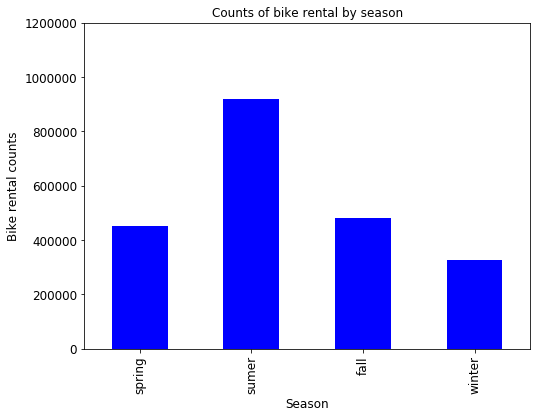

season
1    450740
2    918589
3    479694
4    326137
Name: count, dtype: int64


In [29]:
ax = train.groupby('season')['count'].sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Counts of bike rental by season", 
                                       color='blue', fontsize=12)
ax.set_xlabel("Season", fontsize=12)
ax.set_xticklabels(['spring','sumer','fall','winter'])
ax.set_ylim([0,1200000])
ax.set_ylabel("Bike rental counts", fontsize=12)
plt.show()
print(train.groupby('season')['count'].sum())

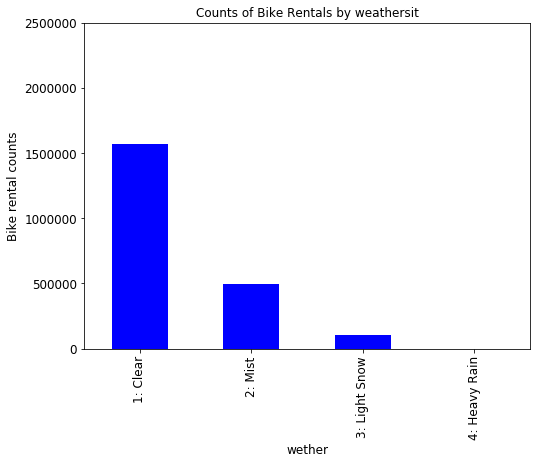

weather
1    1571225
2     497735
3     105977
4        223
Name: count, dtype: int64


In [33]:
ax = train.groupby('weather')['count'].sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Counts of Bike Rentals by weathersit", 
                                       color='blue', fontsize=12)
ax.set_xlabel("wether", fontsize=12)
ax.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])
ax.set_ylabel("Bike rental counts", fontsize=12)
ax.set_ylim([0,2500000])
plt.show()
print(train.groupby('weather')['count'].sum())

In [36]:
train.shape, test.shape

((12980, 14), (4399, 11))

In [37]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1/1/2011,0
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1/1/2011,1
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1/1/2011,2
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1/1/2011,3
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1/1/2011,4


In [38]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,30-06-2012 01:00,3,0,0,3,26.24,28.790,89,15.0013,3,55
1,30-06-2012 02:00,3,0,0,2,26.24,28.790,89,0.0000,7,54
2,30-06-2012 03:00,3,0,0,2,26.24,28.790,89,0.0000,3,20
3,30-06-2012 04:00,3,0,0,2,25.42,27.275,94,0.0000,3,15
4,30-06-2012 05:00,3,0,0,1,26.24,28.790,89,11.0014,3,7


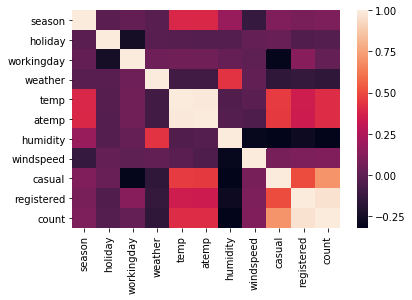

In [39]:
sn.heatmap(train.corr())

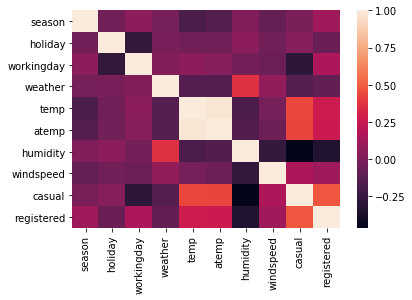

In [40]:
sn.heatmap(test.corr())

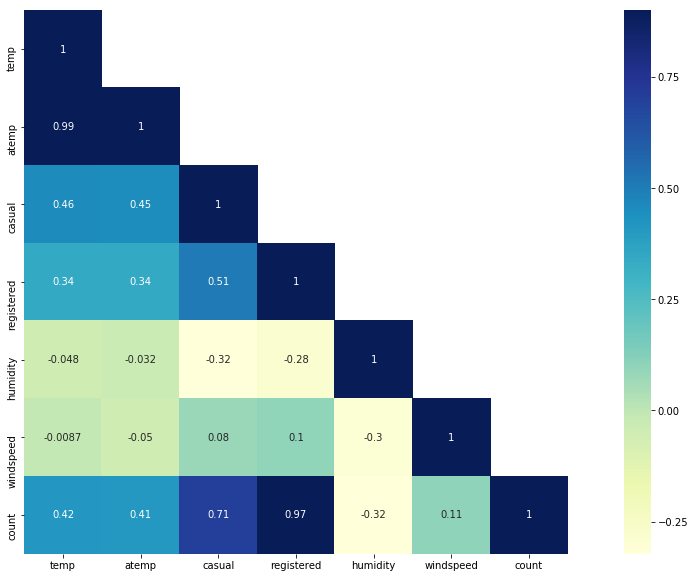

In [41]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [42]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
dtype: int64

In [43]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [50]:
train=pd.read_csv('C:/Users/Dell/Desktop/D/train.csv')

In [51]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [52]:
test=pd.read_csv('C:/Users/Dell/Desktop/D/test.csv')

In [53]:
train = train.drop(['datetime', 'atemp'],axis=1)
test = test.drop(['datetime', 'atemp'], axis=1)
training = training.drop(['datetime', 'atemp'],axis=1)
validation = validation.drop(['datetime', 'atemp'],axis=1)

In [54]:
from sklearn.linear_model import LinearRegression


In [55]:
lModel = LinearRegression()


In [56]:
X_train = training.drop('count', 1)
y_train = np.log(training['count'])
X_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

In [57]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape


((5571, 9), (5571,), (7409, 9), (7409,))

In [58]:
lModel.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
prediction = lModel.predict(X_val)

In [60]:
prediction

array([3.17362856, 3.15552165, 3.08670235, ..., 4.7718514 , 4.01473772,
       3.99089102])